Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

LINK: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [19]:
dataset = pd.read_csv('dataset.csv')

In [20]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## PERFORMING EDA

In [21]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
dataset.duplicated().sum()

1

In [23]:
dataset[dataset.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [25]:
dataset = dataset.drop_duplicates()

In [28]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [29]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [30]:
X = dataset.iloc[:,:-1]
Y = dataset['target']

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [34]:
RFC = RandomForestClassifier(n_estimators=100,max_depth=10)

In [35]:
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10)

In [36]:
Y_pred = RFC.predict(X_test)

In [37]:
accuracy_score(Y_test,Y_pred)

0.8461538461538461

In [38]:
precision_score(Y_test,Y_pred)

0.8571428571428571

In [39]:
recall_score(Y_test,Y_pred)

0.8571428571428571

In [41]:
f1_score(Y_test,Y_pred)

0.8571428571428571

In [42]:
RFC.feature_importances_

array([0.08836801, 0.02547286, 0.12302656, 0.06555016, 0.0829179 ,
       0.01221169, 0.01822193, 0.12548189, 0.05640529, 0.11924773,
       0.0474981 , 0.13908532, 0.09651255])

In [44]:
ca = 0.13908532

thalach = 0.12548189

cp = 0.12302656

oldpeak = 0.11924773

thal = 0.09651255

In [45]:
features_imp  = pd.DataFrame({
    'Features':['ca','thalach','cp','oldpeak','thal'],
    'Importance':[ca,thalach,cp,oldpeak,thal]
})

In [46]:
features_imp

,Features,Importance
0,ca,0.139085
1,thalach,0.125482
2,cp,0.123027
3,oldpeak,0.119248
4,thal,0.096513


<BarContainer object of 5 artists>

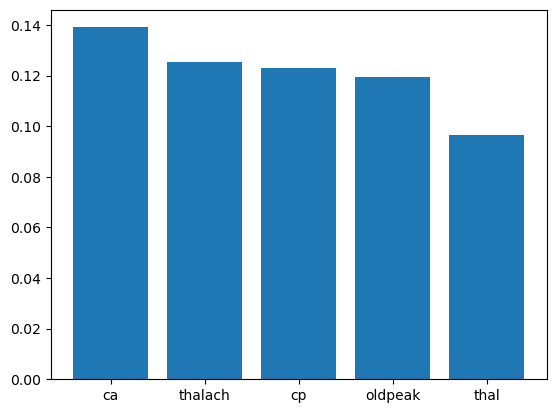

In [48]:
plt.bar(x=features_imp['Features'],height=features_imp['Importance'])

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [54]:
parameters = {
    'n_estimators':[10,20,40],
    'criterion':['gini','entropy'],
    'max_depth':[1,3,5,6],
    'min_samples_split':[1,2,4,7],
    'min_samples_leaf':[2,6,7,9]
}

In [55]:
Hypertuned = GridSearchCV(estimator=RFC,param_grid=parameters,cv=5)

In [56]:
Hypertuned.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 6],
                         'min_samples_leaf': [2, 6, 7, 9],
                         'min_samples_split': [1, 2, 4, 7],
                         'n_estimators': [10, 20, 40]})

In [57]:
Hypertuned.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'n_estimators': 40}

In [58]:
# Now, we will use these parameters to create the model and compare the accuracy of both the models

In [59]:
RFC_new = RandomForestClassifier(criterion='gini',max_depth=3,min_samples_leaf=7,min_samples_split=7,n_estimators=40)

In [60]:
RFC_new.fit(X_train,Y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=7, min_samples_split=7,
                       n_estimators=40)

In [61]:
Y_new = RFC_new.predict(X_test)

In [62]:
accuracy_score(Y_test,Y_new)

0.8571428571428571

CONCLUSION: If we observe accuarcy of both the models, the first model (RFC) gave 84.6% and RFC_new gave 85.7%. However, there is only a slight change but the hypertuned model gave more accuracy.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [70]:
from sklearn.datasets import make_classification

In [71]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [72]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_tr, Y_tr)

RandomForestClassifier(random_state=42)

In [75]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature1 = indices[0]
feature2 = indices[1]

In [76]:
x_min, x_max = X[:, feature1].min() - 1, X[:, feature1].max() + 1
y_min, y_max = X[:, feature2].min() - 1, X[:, feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [77]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

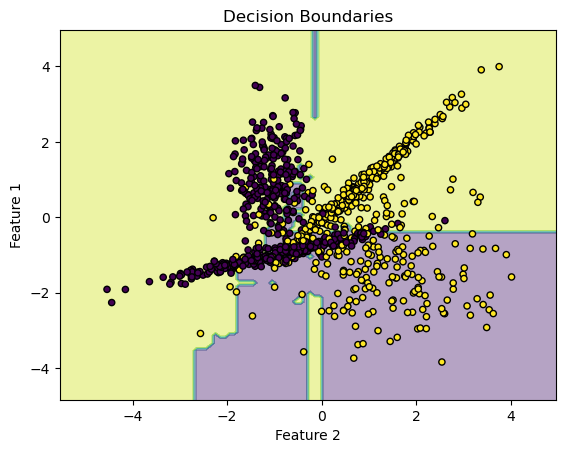

In [78]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, feature1], X[:, feature2], c=y, s=20, edgecolor='k')
plt.xlabel(f'Feature {feature1+1}')
plt.ylabel(f'Feature {feature2+1}')
plt.title('Decision Boundaries')
plt.show()